In [13]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sys.path.append('..')
import rbf_functions

In [3]:
rbf = rbf_functions.squared_exponential_rbf.__name__
output_dir = f"../output/{rbf}/"

In [4]:
archives_by_nfe = pd.read_csv(output_dir + '10_hypervolume.csv')
archives_by_nfe

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5
0,100,0,44.992592,0.550813,0.433861,0.318733,0.084848,1.0
1,100,1,45.509716,0.202915,0.163180,0.148392,0.081956,1.0
2,100,2,46.095984,0.295024,0.333018,0.155382,0.085453,1.0
3,100,3,30.257661,0.178661,0.167211,0.185919,0.081523,1.0
4,100,4,60.084563,0.545179,0.371366,0.321381,0.086085,1.0
...,...,...,...,...,...,...,...,...
32763,50579,519,51.786214,0.916771,0.747805,0.549118,0.080422,1.0
32764,50579,520,74.522549,0.787565,0.100560,0.278010,0.077419,1.0
32765,50579,521,65.774205,0.714676,0.491076,0.900652,0.081092,1.0
32766,50579,522,48.477740,0.896642,0.452190,0.751339,0.068596,1.0


In [5]:
from platypus import Solution, Problem

n_rbfs = 4
n_objs = 6
n_vars = n_rbfs * 8 

problem = Problem(n_vars, n_objs)

# matters for hypervolume
problem.directions[0] = Problem.MINIMIZE  # hydropower
problem.directions[1] = Problem.MINIMIZE  # atomicpowerplant
problem.directions[2] = Problem.MINIMIZE  # baltimore
problem.directions[3] = Problem.MINIMIZE  # chester
problem.directions[4] = Problem.MAXIMIZE  # environment
problem.directions[5] = Problem.MINIMIZE  # recreation

archives = {}
for nfe, generation in archives_by_nfe.groupby("Unnamed: 0"):
    # we slice from 2, getting rid of the first two columns 
    # which contain the NFE and ID of each solution
    archive = []
    for i, row in generation.iloc[:, 2::].iterrows():
        solution = Solution(problem)
        solution.objectives = row
        archive.append(solution)
    archives[nfe] = archive
        

In [7]:
data = pd.read_csv(output_dir +'10_solution.csv')

ref_set = []
for i, row in data.iterrows():
    solution = Solution(problem)
    solution.objectives = row
    ref_set.append(solution)

In [8]:
from platypus import EpsilonIndicator

ei = EpsilonIndicator(reference_set=ref_set)
nfes = []
eis = []
for nfe, archive in archives.items():
    nfes.append(nfe)
    eis.append(ei.calculate(archive))

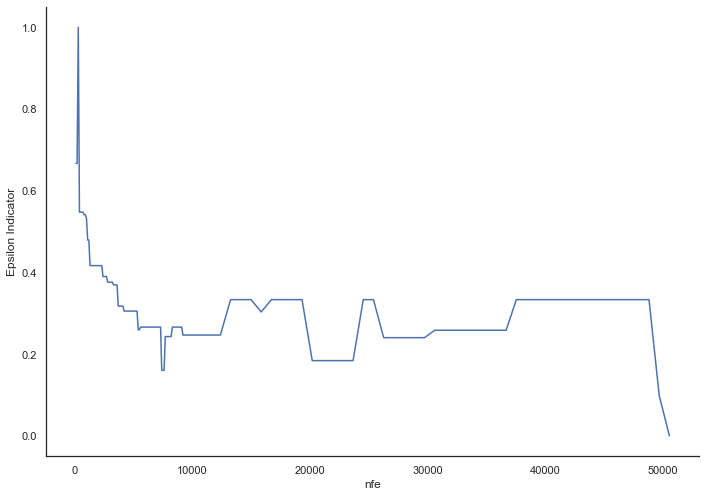

In [14]:
sns.set_style("white")

fig, ax = plt.subplots()

ax.plot(nfes, eis)
ax.set_xlabel('nfe')
ax.set_ylabel('Epsilon Indicator')

sns.despine()

plt.show()

In [10]:
from platypus import Spacing

sp = Spacing()
nfes = []
sps = []
for nfe, archive in archives.items():
    nfes.append(nfe)
    sps.append(sp.calculate(archive))

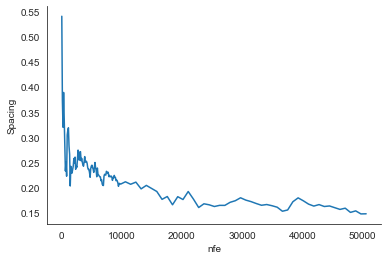

In [11]:
sns.set_style("white")

fig, ax = plt.subplots()

ax.plot(nfes, sps)
ax.set_xlabel('nfe')
ax.set_ylabel('Spacing')

sns.despine()

plt.show()